In [159]:
import pandas as pd
from numpy import ndarray

In [160]:
train = pd.read_csv('data/train.csv', header=0)
test = pd.read_csv('data/test.csv', header=0)

In [161]:
train['Sex'] = train['Sex'].replace({'male':0})
train['Sex'] = train['Sex'].replace({'female':1})

test['Sex'] = test['Sex'].replace({'male':0})
test['Sex'] = test['Sex'].replace({'female':1})


train = train[['Survived','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

#Imported package to fill in missing data in dataframe
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer(random_state=0)
df_imputed = impute_it.fit_transform(train)


df_imputed = pd.DataFrame(df_imputed, columns=train.columns)

# df_imputed will have the missing values filled
print(df_imputed)

     Survived  Pclass  Sex        Age  SibSp  Parch     Fare
0         0.0     3.0  0.0  22.000000    1.0    0.0   7.2500
1         1.0     1.0  1.0  38.000000    1.0    0.0  71.2833
2         1.0     3.0  1.0  26.000000    0.0    0.0   7.9250
3         1.0     1.0  1.0  35.000000    1.0    0.0  53.1000
4         0.0     3.0  0.0  35.000000    0.0    0.0   8.0500
..        ...     ...  ...        ...    ...    ...      ...
886       0.0     2.0  0.0  27.000000    0.0    0.0  13.0000
887       1.0     1.0  1.0  19.000000    0.0    0.0  30.0000
888       0.0     3.0  1.0  23.274703    1.0    2.0  23.4500
889       1.0     1.0  0.0  26.000000    0.0    0.0  30.0000
890       0.0     3.0  0.0  32.000000    0.0    0.0   7.7500

[891 rows x 7 columns]


In [162]:
train_X = df_imputed.drop(['Survived'], axis = 1).to_numpy()
train_y = df_imputed['Survived'].to_numpy()

test_X = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].to_numpy()

In [163]:
from sklearn.model_selection import train_test_split

#Splits data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y ,test_size=0.20)

from sklearn.preprocessing import MinMaxScaler #Used to normalized data

mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)



Notes:
-   We use binary_crossentropy as our loss function since we are only perfomring a binary classification and not a multiclass one. 
-   We apply the sigmoid function to map to a value between 0 and 1. 
-   Changing the hyperparameter epochs to a higher values increases model processing time. 

In [164]:
from tensorflow import keras
from keras.models import Sequential

model = Sequential() #Utilized Sequential to go from one layer to the next.

#Input Layer with 6 input neurons
model.add(keras.layers.Dense(2, activation='relu', name='layer1', input_dim=X_train.shape[1]))

#Hidden Layerr
model.add(keras.layers.Dense(3, activation='relu', name='layer2'))

# Extra hidden layers to experiment with model performance
# model.add(keras.layers.Dense(3, activation='relu', name='layer4'))
# model.add(keras.layers.Dense(2, activation='relu', name='layer5'))

#Output Layer 
model.add(keras.layers.Dense(1, activation='sigmoid', name='layer3'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=200, batch_size=20, validation_data=(X_test, y_test))

Epoch 1/200


36/36 [==============================] - 1s 4ms/step - loss: 0.7000 - accuracy: 0.6124 - val_loss: 0.6909 - val_accuracy: 0.6313
Epoch 2/200
36/36 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.6124 - val_loss: 0.6860 - val_accuracy: 0.6313
Epoch 3/200
36/36 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.6124 - val_loss: 0.6824 - val_accuracy: 0.6313
Epoch 4/200
36/36 [==============================] - 0s 1ms/step - loss: 0.6878 - accuracy: 0.6124 - val_loss: 0.6791 - val_accuracy: 0.6313
Epoch 5/200
36/36 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.6124 - val_loss: 0.6766 - val_accuracy: 0.6313
Epoch 6/200
36/36 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.6124 - val_loss: 0.6739 - val_accuracy: 0.6313
Epoch 7/200
36/36 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.6124 - val_loss: 0.6718 - val_accuracy: 0.6313
Epoch 8/200
36/36 [======

In [165]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

Observations:
-   When we increase epoch size, the model initially shows signs of pick up patterns well from the training data as the lines are shown to be close to each other initially. The lines then begin to diverge at around 30 epochs which shows signs that the model is starting to overfit. This may indicate that the model is memorizing the trianing data too well which leads to capturing of noise and patterns that don't generalize the new data well.
-   Using less layers seems to reduce the variance in our model thus minimizes overfitting. 
-   The occurance of overfitting data reduces when we reduce the number of outputs in the input and hidden layers. 

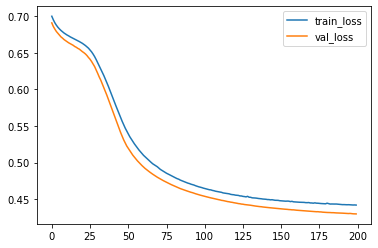

In [166]:
import matplotlib.pyplot as plt
plt.plot(loss_train, label='train_loss')
plt.plot(loss_val, label='val_loss')
plt.legend()

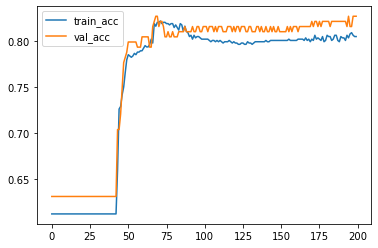

In [167]:
plt.plot(acc_train, label='train_acc')
plt.plot(acc_val, label='val_acc')
plt.legend()

In [169]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
predictions = model.predict(X_test)

# Threshold set to convert predictions to binary outputs
threshold = 0.5
predictions = [1 if p >= threshold else 0 for p in predictions]

# Metrics used to evaluate Forward Neural Network Performance
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

6/6 [==============================] - 0s 801us/step
Accuracy: 0.8268156424581006
Precision: 0.8070175438596491
Recall: 0.696969696969697
F1 Score: 0.7479674796747967
